In [73]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import glob

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [161]:
# data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_500_finish_data.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
1,0,-0.00200,500,7000,9000,669.05
2,0,-0.00199,500,7000,9000,675.83
3,0,-0.00198,500,7000,9000,682.81
4,0,-0.00197,500,7000,9000,689.82
5,0,-0.00196,500,7000,9000,696.80
...,...,...,...,...,...,...
120997,300,0.00196,500,7000,9000,516.32
120998,300,0.00197,500,7000,9000,516.04
120999,300,0.00198,500,7000,9000,515.74
121000,300,0.00199,500,7000,9000,515.43


In [162]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
1,0,-0.00200,669.05
2,0,-0.00199,675.83
3,0,-0.00198,682.81
4,0,-0.00197,689.82
5,0,-0.00196,696.80
...,...,...,...
120997,300,0.00196,516.32
120998,300,0.00197,516.04
120999,300,0.00198,515.74
121000,300,0.00199,515.43


In [163]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

        X-Koordinate  Y-Koordinate  Temperatur
85427            212       0.00002     1318.80
6977              17      -0.00058     1466.20
101558           252       0.00053     1149.50
22333             55       0.00022     1487.20
13974             34       0.00105     1194.30
...              ...           ...         ...
110269           274      -0.00080     1065.60
119880           298      -0.00117      936.07
103695           257       0.00180      701.17
861                2      -0.00144     1057.50
15796             39      -0.00083     1390.80

[121001 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,212,0.00002,1318.80
1,17,-0.00058,1466.20
2,252,0.00053,1149.50
3,55,0.00022,1487.20
4,34,0.00105,1194.30
...,...,...,...
120996,274,-0.00080,1065.60
120997,298,-0.00117,936.07
120998,257,0.00180,701.17
120999,2,-0.00144,1057.50


In [164]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_reset.drop("Temperatur", axis=1)
X = df1
y = label


In [165]:
X

,X-Koordinate,Y-Koordinate
0,212,0.00002
1,17,-0.00058
2,252,0.00053
3,55,0.00022
4,34,0.00105
...,...,...
120996,274,-0.00080
120997,298,-0.00117
120998,257,0.00180
120999,2,-0.00144


In [166]:
y

0         1318.80
1         1466.20
2         1149.50
3         1487.20
4         1194.30
           ...   
120996    1065.60
120997     936.07
120998     701.17
120999    1057.50
121000    1390.80
Name: Temperatur, Length: 121001, dtype: float64

In [167]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [168]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze unterschiedliche Skalierungsparameter

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))


In [169]:
X_train_scaled

array([[0.48666667, 0.7575    ],
       [0.06666667, 0.4075    ],
       [0.48333333, 0.2       ],
       ...,
       [0.27333333, 0.745     ],
       [0.36333333, 0.64      ],
       [0.89666667, 0.49      ]])

In [170]:
y_train_scaled.max()

1.0

In [171]:
# Lernplan erstellen
#initial_learning_rate = 0.1
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

In [178]:
# Netzwerkarchitektur
model = Sequential([
    # Eingabeschicht
    Dense(32, activation='relu', input_shape=(2,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    #Dropout(0.01),
    # Versteckte Schicht
    #Dense(8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    #Dropout(0.01),
    # Ausgabeschicht für Regression (1 Einheit ohne Aktivierungsfunktion)
    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = 'adam' #Adam(learningrate =  0.001)

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', restore_best_weights=True, min_delta = 0.0001)

# Trainingsparameter
batch_size = 50
epochs = 100

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
1549/1549 [==============================] - 2s 1ms/step - loss: 0.3007 - mae: 0.1261 - val_loss: 0.0647 - val_mae: 0.0560
Epoch 2/100
1549/1549 [==============================] - 1s 949us/step - loss: 0.0252 - mae: 0.0526 - val_loss: 0.0110 - val_mae: 0.0502
Epoch 3/100
1549/1549 [==============================] - 1s 923us/step - loss: 0.0092 - mae: 0.0470 - val_loss: 0.0083 - val_mae: 0.0455
Epoch 4/100
1549/1549 [==============================] - 2s 970us/step - loss: 0.0073 - mae: 0.0400 - val_loss: 0.0068 - val_mae: 0.0394
Epoch 5/100
1549/1549 [==============================] - 1s 905us/step - loss: 0.0060 - mae: 0.0334 - val_loss: 0.0058 - val_mae: 0.0351
Epoch 6/100
1549/1549 [==============================] - 1s 942us/step - loss: 0.0051 - mae: 0.0282 - val_loss: 0.0048 - val_mae: 0.0250
Epoch 7/100
1549/1549 [==============================] - 1s 942us/step - loss: 0.0045 - mae: 0.0249 - val_loss: 0.0043 - val_mae: 0.0226
Epoch 8/100
1549/1549 [====================

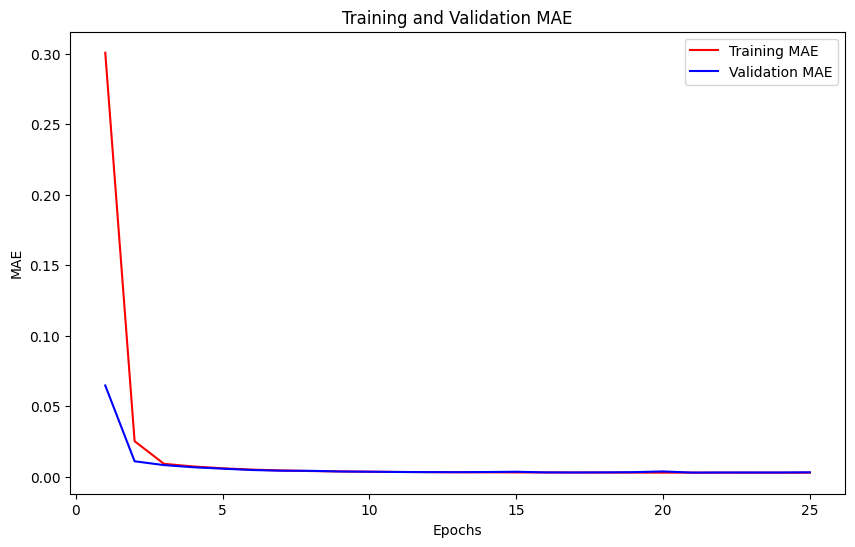

In [179]:
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [180]:
scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[10]} Actual: {original_actual_values[10]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")
    
    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]
    
    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)
    
    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

 Bsp. Predicted: [1430.8009] Actual: [1436.7] 
Durchschnittliche Abweichung (MAE): [45.7732519]


# GridSearch

In [11]:
# Schritt 1: Definiere dein Modell als eine Funktion, die Hyperparameter akzeptiert
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Schritt 2: Erstelle eine Instanz von KerasRegressor ohne batch_size und epochs im param_grid
model = KerasRegressor(model=build_model, verbose=1)

# Schritt 3: Definiere den Parameter-Raum für die Grid-Suche OHNE batch_size und epochs
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh']
}

# Optional: Definiere Fit-Parameter (wie batch_size und epochs) separat
fit_params = {
    'batch_size': 32,
    'epochs': 10
}

# Schritt 4: Führe GridSearchCV aus mit fit_params, wenn nötig
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled, **fit_params)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))




Epoch 1/10


3025/3025 [==============================] - 6s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 2/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 3/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 4/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 6/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 7/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 8/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 9/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_er

In [12]:
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

model = KerasRegressor(model=build_model, verbose=1)

param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'fit__batch_size': [10, 20, 32],  # Testen verschiedener batch_size Werte
    'fit__epochs': [5, 10]  # Optional: Testen verschiedener epoch Werte
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))


Epoch 1/5
4840/4840 [==============================] - 10s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 2/5
4840/4840 [==============================] - 9s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 3/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 4/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Best: 0.845704 using {'fit__batch_size': 20, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'adam'}
0.840889 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'adam'}
0.834983 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'sgd'}
0.833309 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'tanh', 'model__opt